In [5]:
import awkward as ak
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from helpers.physics_functions import *


In [10]:
muon_vars = ["Muon_pt", "Muon_eta", "Muon_phi", "Muon_charge", "Muon_pfRelIso03_all", "Muon_pfRelIso04_all"]
electron_vars = ["Electron_pt", "Electron_eta", "Electron_phi", "Electron_charge"]
jet_vars = ["Jet_pt", "Jet_eta", "Jet_phi", "Jet_mass", "Jet_nConstituents", "Jet_btagCSVV2", "Jet_btagDeepB", "Jet_btagDeepFlavB", "MET_pt", "MET_sumEt"]

path_to_input = f"/global/cfs/cdirs/m3246/rmastand/dimuonAD/skimmed_data_2016H_30555/"
path_to_output = ""

num_files = 28


- HT (sum of pt of jets with some cut) -> `HT`
- sum of (pt of jets)^2 -> `sum_pt2_jet`
- sum of (pt of leptons) -> `sum_pt_muon`, `sum_pt_electron`, `sum_pt_lepton`
- sum of (pt of leptons)^2 -> `sum_pt2_muon`, `sum_pt2_electron`, `sum_pt2_lepton`
- sum of (pt of both jets and leptons) -> `sum_pt_jet_muon`, `sum_pt_jet_electron`, `sum_pt_jet_lepton`
- sum of (pt of both jets and leptons)^2 -> `sum_pt2_jet_muon`, `sum_pt2_jet_electron`, `sum_pt2_jet_lepton`
- number of leptons (muons) -> `n_muon`, `n_electron`, `n_lepton`
- number of jets -> `n_jet`
- MET -> `MET_pt`
- dilepton pt -> `dimu_pt`

In [11]:
all_data = {
    "HT":[],
    "sum_pt2_jet":[],
    "sum_pt_muon":[],
    "sum_pt_electron":[],
    "sum_pt_lepton":[],
    "sum_pt2_muon":[],
    "sum_pt2_electron":[],
    "sum_pt2_lepton":[],
    "sum_pt_jet_muon":[],
    "sum_pt_jet_electron":[],
    "sum_pt_jet_lepton":[],
    "sum_pt2_jet_muon":[],
    "sum_pt2_jet_electron":[],
    "sum_pt2_jet_lepton":[],
    "n_muon":[],
    "n_electron":[],
    "n_lepton":[],
    "n_jet":[],
    "MET_pt":[],
    "dimu_pt":[],
    "dimu_mass":[],
    }


In [12]:
for i in range(num_files):
    
    print(i)
    
    # LOAD IN DATA
    
    with open(f"{path_to_input}/all_mu_{i}", "rb") as input_file:
        loc_mu_feature = pickle.load(input_file)
        
    with open(f"{path_to_input}/all_e_{i}", "rb") as input_file:
        loc_e_feature = pickle.load(input_file)
  
    with open(f"{path_to_input}/all_jet_{i}", "rb") as input_file:
        loc_jet_feature = pickle.load(input_file)
        
    # START ANALYSIS
        
    # filter jets        
    jet_pt_filter = loc_jet_feature["Jet_pt"] > 20
    passed_jet_pts = loc_jet_feature["Jet_pt"][jet_pt_filter]
        
    all_data["HT"].append(np.sum(passed_jet_pts, axis = 1).to_numpy())
    all_data["sum_pt2_jet"].append(np.sum(passed_jet_pts**2, axis = 1).to_numpy())
    
    all_data["sum_pt_muon"].append(np.sum(loc_mu_feature["Muon_pt"], axis = 1).to_numpy())
    all_data["sum_pt_electron"].append(np.sum(loc_e_feature["Electron_pt"], axis = 1).to_numpy())
    all_data["sum_pt_lepton"].append(np.sum(loc_mu_feature["Muon_pt"], axis = 1).to_numpy() + np.sum(loc_e_feature["Electron_pt"], axis = 1).to_numpy())
    
    all_data["sum_pt2_muon"].append(np.sum(loc_mu_feature["Muon_pt"]**2, axis = 1).to_numpy())
    all_data["sum_pt2_electron"].append(np.sum(loc_e_feature["Electron_pt"]**2, axis = 1).to_numpy())
    all_data["sum_pt2_lepton"].append(np.sum(loc_mu_feature["Muon_pt"]**2, axis = 1).to_numpy() + np.sum(loc_e_feature["Electron_pt"]**2, axis = 1).to_numpy())
    
    all_data["sum_pt_jet_muon"].append(np.sum(passed_jet_pts, axis = 1).to_numpy() + np.sum(loc_mu_feature["Muon_pt"], axis = 1).to_numpy())
    all_data["sum_pt_jet_electron"].append(np.sum(passed_jet_pts, axis = 1).to_numpy() + np.sum(loc_e_feature["Electron_pt"], axis = 1).to_numpy())
    all_data["sum_pt_jet_lepton"].append(np.sum(passed_jet_pts, axis = 1).to_numpy() + np.sum(loc_mu_feature["Muon_pt"], axis = 1).to_numpy() + np.sum(loc_e_feature["Electron_pt"], axis = 1).to_numpy())

    all_data["sum_pt2_jet_muon"].append(np.sum(passed_jet_pts**2, axis = 1).to_numpy() + np.sum(loc_mu_feature["Muon_pt"]**2, axis = 1).to_numpy())
    all_data["sum_pt2_jet_electron"].append(np.sum(passed_jet_pts**2, axis = 1).to_numpy() + np.sum(loc_e_feature["Electron_pt"]**2, axis = 1).to_numpy())
    all_data["sum_pt2_jet_lepton"].append(np.sum(passed_jet_pts**2, axis = 1).to_numpy() + np.sum(loc_mu_feature["Muon_pt"]**2, axis = 1).to_numpy() + np.sum(loc_e_feature["Electron_pt"]**2, axis = 1).to_numpy())

    all_data["n_muon"].append(np.sum(loc_mu_feature["Muon_pt"] > -1, axis = 1).to_numpy())
    all_data["n_electron"].append(np.sum(loc_e_feature["Electron_pt"] > -1, axis = 1).to_numpy())
    all_data["n_lepton"].append(np.sum(loc_mu_feature["Muon_pt"] > -1, axis = 1).to_numpy() + np.sum(loc_e_feature["Electron_pt"] > -1, axis = 1).to_numpy())
    all_data["n_jet"].append(np.sum(jet_pt_filter, axis = 1).to_numpy())
    
    all_data["MET_pt"].append(loc_jet_feature["MET_pt"].to_numpy())
    
    # get dimuon system
        
    loc_muon_filter = loc_mu_feature["Muon_charge"] == -1
    loc_amuon_filter = loc_mu_feature["Muon_charge"] == 1
        
    dimu_mass, dimu_pt, _, _ = assemble_m_inv(muon_mass, ak.firsts(loc_mu_feature["Muon_pt"][loc_muon_filter]), ak.firsts(loc_mu_feature["Muon_eta"][loc_muon_filter]), ak.firsts(loc_mu_feature["Muon_phi"][loc_muon_filter]), 
                                   muon_mass, ak.firsts(loc_mu_feature["Muon_pt"][loc_amuon_filter]),  ak.firsts(loc_mu_feature["Muon_eta"][loc_amuon_filter]),  ak.firsts(loc_mu_feature["Muon_phi"][loc_amuon_filter]))


    all_data["dimu_pt"].append(dimu_pt.to_numpy(allow_missing = True))
    all_data["dimu_mass"].append(dimu_mass.to_numpy(allow_missing = True))
    


    
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [13]:
for key in all_data.keys():
    all_data[key] = np.hstack(all_data[key])
    print(key, all_data[key].shape)


HT (48028641,)
sum_pt2_jet (48028641,)
sum_pt_muon (48028641,)
sum_pt_electron (48028641,)
sum_pt_lepton (48028641,)
sum_pt2_muon (48028641,)
sum_pt2_electron (48028641,)
sum_pt2_lepton (48028641,)
sum_pt_jet_muon (48028641,)
sum_pt_jet_electron (48028641,)
sum_pt_jet_lepton (48028641,)
sum_pt2_jet_muon (48028641,)
sum_pt2_jet_electron (48028641,)
sum_pt2_jet_lepton (48028641,)
n_muon (48028641,)
n_electron (48028641,)
n_lepton (48028641,)
n_jet (48028641,)
MET_pt (48028641,)
dimu_pt (48028641,)
dimu_mass (48028641,)


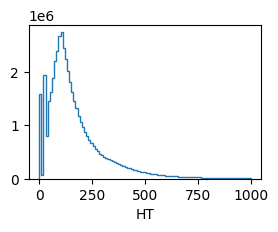

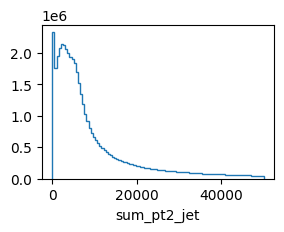

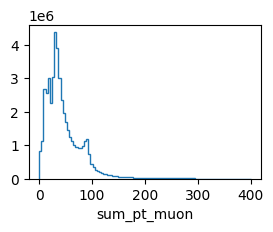

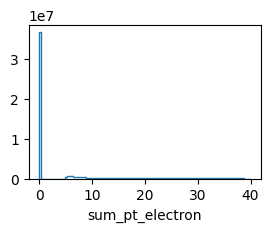

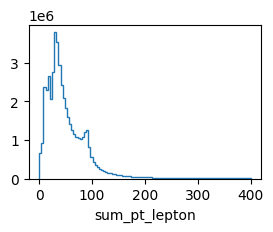

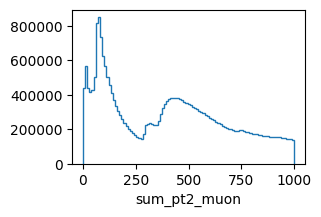

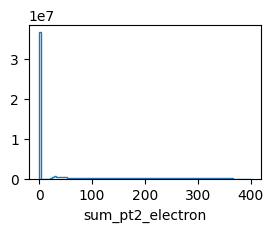

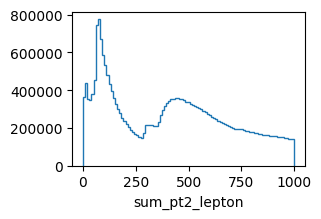

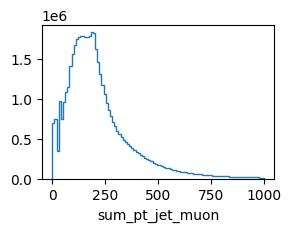

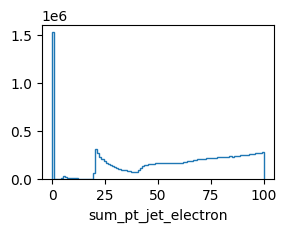

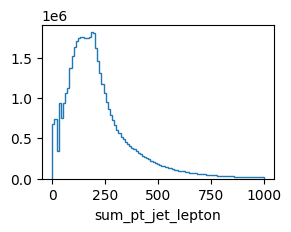

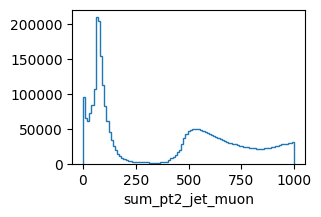

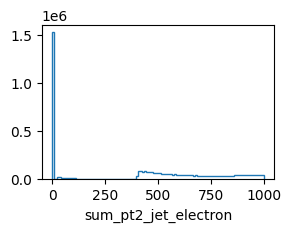

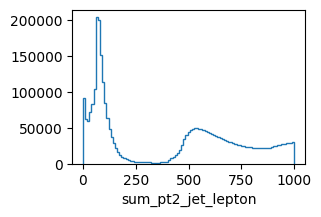

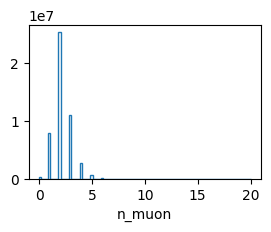

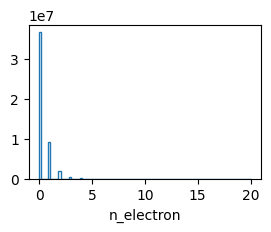

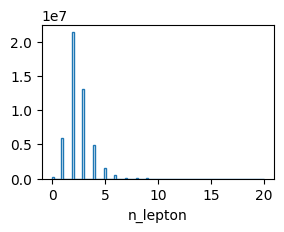

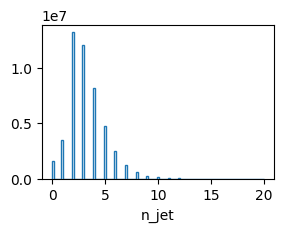

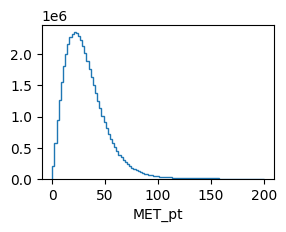

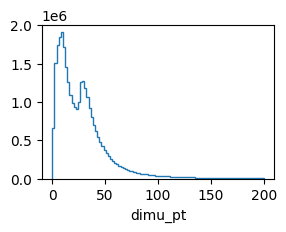

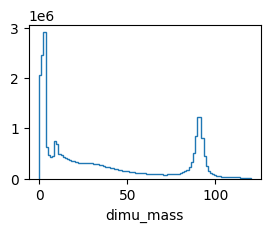

In [15]:
bin_limits = {
    "HT":[0, 1000],
    "sum_pt2_jet":[0, 50000],
    "sum_pt_muon":[0, 400],
    "sum_pt_electron":[0, 40],
    "sum_pt_lepton":[0, 400],
    "sum_pt2_muon":[0, 1000],
    "sum_pt2_electron":[0, 400],
    "sum_pt2_lepton":[0, 1000],
    "sum_pt_jet_muon":[0, 1000],
    "sum_pt_jet_electron":[0, 100],
    "sum_pt_jet_lepton":[0, 1000],
    "sum_pt2_jet_muon":[0, 1000],
    "sum_pt2_jet_electron":[0, 1000],
    "sum_pt2_jet_lepton":[0, 1000],
    "n_muon":[0, 20],
    "n_electron":[0, 20],
    "n_lepton":[0, 20],
    "n_jet":[0, 20],
    "MET_pt":[0, 200],
    "dimu_pt":[0, 200],
    "dimu_mass":[0, 120],
    }


for key in all_data.keys():
    plt.figure(figsize = (3,2))
    plt.hist(all_data[key], bins = np.linspace(bin_limits[key][0], bin_limits[key][1], 100), histtype = "step")
    plt.xlabel(key)
    plt.show()